## DSCI564 Survival Analysis
##### Instructor: Mohammad Reza Rajati, PhD
##### Yutao Ye
##### USCID: 2448443089

---

## Introduction
##### Survival Analysis is a subfield of statistics that studies time to a specific event (such as death or malfunction of an equipment) as a random variable. The statistical properties of the random variable such as mean time to an event are very important in many fields such as biostatistics and reliability engineering.

##### In this project, I will perform survival analysis on benchmark data and learn about statistical tools for survival analysis such as the Kaplan-Meier estimator and the Cox Proportional Hazards Model.

---

#### Section (a): Data Exploration and Pre-processing

In [9]:
library(survival)
head(pbcseq)
str(pbcseq)

,id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage,sex_num
,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,1,400,2,1,58.76523,f,0,1,1,1,1,14.5,261,2.60,1718,138.0,190,12.2,4,1
2,1,400,2,1,58.76523,f,192,1,1,1,1,21.3,NA,2.94,1612,6.2,183,11.2,4,1
3,2,5169,0,1,56.44627,f,0,0,1,1,0,1.1,302,4.14,7395,113.5,221,10.6,3,1
4,2,5169,0,1,56.44627,f,182,0,1,1,0,0.8,NA,3.60,2107,139.5,188,11.0,3,1
5,2,5169,0,1,56.44627,f,365,0,1,1,0,1.0,NA,3.55,1711,144.2,161,11.6,3,1
6,2,5169,0,1,56.44627,f,768,0,1,1,0,1.9,NA,3.92,1365,144.2,122,10.6,3,1


'data.frame':	1945 obs. of  20 variables:
 $ id      : int  1 1 2 2 2 2 2 2 2 2 ...
 $ futime  : int  400 400 5169 5169 5169 5169 5169 5169 5169 5169 ...
 $ status  : int  2 2 0 0 0 0 0 0 0 0 ...
 $ trt     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age     : num  58.8 58.8 56.4 56.4 56.4 ...
 $ sex     : Factor w/ 2 levels "m","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ day     : int  0 192 0 182 365 768 1790 2151 2515 2882 ...
 $ ascites : int  1 1 0 0 0 0 1 1 1 1 ...
 $ hepato  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ spiders : int  1 1 1 1 1 1 1 1 1 1 ...
 $ edema   : num  1 1 0 0 0 0 0.5 1 1 1 ...
 $ bili    : num  14.5 21.3 1.1 0.8 1 1.9 2.6 3.6 4.2 3.6 ...
 $ chol    : int  261 NA 302 NA NA NA 230 NA NA 244 ...
 $ albumin : num  2.6 2.94 4.14 3.6 3.55 3.92 3.32 2.92 2.73 2.8 ...
 $ alk.phos: int  1718 1612 7395 2107 1711 1365 1110 996 860 779 ...
 $ ast     : num  138 6.2 113.5 139.5 144.2 ...
 $ platelet: int  190 183 221 188 161 122 135 100 103 113 ...
 $ protime : num  12.2 11.2 10.6 11 11.6 10.6 11.3 1

In [11]:
# Fix the 'sex' variable to match (0=male, 1=female)
# Create 'event_death' for Survival Analysis
pbcseq$sex_num <- as.numeric(pbcseq$sex) - 1
pbcseq$event_death <- ifelse(pbcseq$status == 2, 1, 0)
head(pbcseq)


,id,futime,status,trt,age,sex,day,ascites,hepato,spiders,⋯,bili,chol,albumin,alk.phos,ast,platelet,protime,stage,sex_num,event_death
,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,400,2,1,58.76523,f,0,1,1,1,⋯,14.5,261,2.60,1718,138.0,190,12.2,4,1,1
2,1,400,2,1,58.76523,f,192,1,1,1,⋯,21.3,NA,2.94,1612,6.2,183,11.2,4,1,1
3,2,5169,0,1,56.44627,f,0,0,1,1,⋯,1.1,302,4.14,7395,113.5,221,10.6,3,1,0
4,2,5169,0,1,56.44627,f,182,0,1,1,⋯,0.8,NA,3.60,2107,139.5,188,11.0,3,1,0
5,2,5169,0,1,56.44627,f,365,0,1,1,⋯,1.0,NA,3.55,1711,144.2,161,11.6,3,1,0
6,2,5169,0,1,56.44627,f,768,0,1,1,⋯,1.9,NA,3.92,1365,144.2,122,10.6,3,1,0


#### Section (b): Creating the Survival Object

In [13]:
S <- Surv(pbcseq$day, pbcseq$futime, pbcseq$event_death)
head(S, 20)

 [1] (   0, 400]  ( 192, 400]  (   0,5169+] ( 182,5169+] ( 365,5169+]
 [6] ( 768,5169+] (1790,5169+] (2151,5169+] (2515,5169+] (2882,5169+]
[11] (3226,5169+] (   0,1012]  ( 176,1012]  ( 364,1012]  ( 743,1012] 
[16] (   0,1925]  ( 188,1925]  ( 372,1925]  ( 729,1925]  (1254,1925] 

Any entry with a '+' is a patient who was still alive (or transplanted) at the end of that interval.

#### Section (c): The Kaplan-Meier Estimator

##### (i) The event of interest is death

In [ ]:
pbcseq$event_death <- ifelse(pbcseq$status == 2, 1, 0)

##### (ii) Kaplan-Meier vs. Empirical Distribution
The Kaplan-Meier estimator $\hat{S}(t)$ estimates the survival function $S(t) = P(T > t)$.
In the case where no censoring exists in the data, the Kaplan-Meier estimator reduces exactly to the complement of the **Empirical Distribution Function (EDF)**.

If $F_X(t)$ is the empirical distribution function (the proportion of observations less than or equal to $t$), then:
$$\hat{S}(t) = 1 - F_X(t)$$
This means the survival curve would simply be a step function dropping by $1/n$ at each observed event time, where n is the number of observations.

##### (iii): Kaplan-Meier Estimator & Plotting

In [15]:
pbcseq$start_yr <- pbcseq$day / 365.25
pbcseq$stop_yr  <- pbcseq$futime / 365.25

S_years <- Surv(pbcseq$start_yr, pbcseq$stop_yr, pbcseq$event_death)
km_sex <- survfit(S_years ~ sex_num, data = pbcseq)
km_drug <- survfit(S_years ~ trt, data = pbcseq)

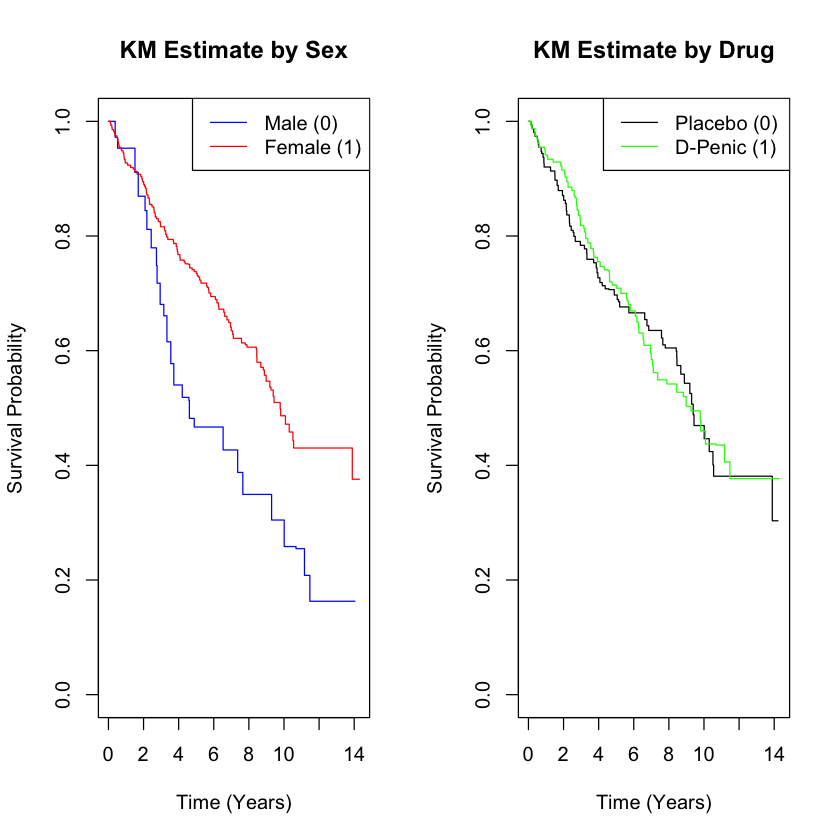

In [19]:
par(mfrow=c(1,2),bg = "white")
plot(km_sex, 
     col = c("blue", "red"), 
     main = "KM Estimate by Sex", 
     xlab = "Time (Years)", ylab = "Survival Probability")
legend("topright", legend=c("Male (0)", "Female (1)"), col=c("blue", "red"), lty=1)

plot(km_drug, 
     col = c("black", "green"), 
     main = "KM Estimate by Drug", 
     xlab = "Time (Years)", ylab = "Survival Probability")
legend("topright", legend=c("Placebo (0)", "D-Penic (1)"), col=c("black", "green"), lty=1)

par(mfrow=c(1,1))

##### (iv): Log-Rank Test

In [22]:
S2 <- Surv(pbcseq$futime, pbcseq$event_death)
print("--- Log-Rank Test Results ---")
diff_sex <- survdiff(S2 ~ sex_num, data = pbcseq)
print(diff_sex)

diff_drug <- survdiff(S2 ~ trt, data = pbcseq)
print(diff_drug)

[1] "--- Log-Rank Test Results ---"
Call:
survdiff(formula = S2 ~ sex_num, data = pbcseq)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex_num=0  237      147     88.8     38.16      44.2
sex_num=1 1708      578    636.2      5.33      44.2

 Chisq= 44.2  on 1 degrees of freedom, p= 3e-11 
Call:
survdiff(formula = S2 ~ trt, data = pbcseq)

        N Observed Expected (O-E)^2/E (O-E)^2/V
trt=0 967      360      360  0.000348  0.000697
trt=1 978      365      365  0.000343  0.000697

 Chisq= 0  on 1 degrees of freedom, p= 1 


We performed the Log-Rank test ($\alpha = 0.05$) to determine if there are significant differences in survival functions based on Sex and Drug.  
1. Test for Sex Result: $\chi^2 = 44.2$, the p-value ($3e^{-11}$) is significantly less than the significance level of $\alpha = 0.05$.  
Conclusion: We reject the null hypothesis. There is a statistically significant difference in survival times between male and female patients. The data suggests that sex is a strong predictor of survival in this dataset.  
2. Test for Drug Result: $\chi^2 \approx 0$, the p-value ($1$) is greater than the significance level of $\alpha = 0.05$. The Chi-square statistic is effectively zero, indicating almost identical observed and expected event counts for both groups.  
Conclusion: We fail to reject the null hypothesis. There is no significant difference in survival between patients treated with D-penicillamine and those treated with a placebo. The type of drug used does not predict survival in this study.